In [5]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import pybaseball
from pybaseball import statcast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pw = 'Password'  # insert whatever your database pass word is here
db = "statcast"  # Database name
host = "localhost"  # Database host
user = "postgres"  # Database user
port = "5432"  # Database port

def connecting():
    #Establish a connection to the PostgreSQL database.

    connection = None  # Initialize connection variable
    connection = psycopg2.connect(
        database=db,
        host=host,
        user=user,
        password=pw,
        port=port
    )  # Establish connection to the database
    return connection  # Return the connection object

def execute_query(connection, query):
 
    # Execute a SQL query on the database.
    try:
        cursor = connection.cursor()  # Create a cursor object
        cursor.execute(query)  # Execute the SQL query
        connection.commit()  # Commit the transaction
    except psycopg2.Error as e:
        print(f"Error executing query: {e}")  # Print error message
        connection.rollback()  # Rollback the transaction in case of error
    finally:
        cursor.close()  

def read_query(connection, query):
    """
    Execute a SQL query and fetch all results. 
    Returns:
        result (list): List of tuples containing the query results.
    """
    cursor = connection.cursor()  # Create a cursor object
    result = None  # Initialize result variable
    cursor.execute(query)  # Execute the SQL query
    result = cursor.fetchall()  # Fetch all results
    return result  # Return the query results
data = statcast('2024-10-02', '2024-10-31')
data.head(10)


This is a large query, it may take a moment to complete


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:15<00:00,  1.96it/s]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
162,KC,2024-10-30,77.5,-1.11,5.65,"Buehler, Walker",657077,621111,strikeout,swinging_strike_blocked,...,6,6,7,Infield shade,Standard,26,-0.044,-0.069,73.80078,7.66279
170,KC,2024-10-30,78.7,-1.01,5.73,"Buehler, Walker",657077,621111,NaN,swinging_strike,...,6,6,7,Infield shade,Standard,27,0.0,-0.025,73.88592,7.98719
182,FC,2024-10-30,93.1,-1.19,5.53,"Buehler, Walker",657077,621111,NaN,swinging_strike,...,6,6,7,Infield shade,Standard,176,0.0,-0.02,74.19593,7.19021
194,KC,2024-10-30,78.5,-1.19,5.7,"Buehler, Walker",657077,621111,NaN,ball,...,6,6,7,Infield shade,Standard,24,0.0,0.015,<NA>,<NA>
202,KC,2024-10-30,77.4,-1.23,5.78,"Buehler, Walker",669224,621111,strikeout,swinging_strike,...,6,6,7,Infield shade,Standard,27,-0.064,-0.21,74.4204,7.78512
215,FF,2024-10-30,97.2,-1.34,5.56,"Buehler, Walker",669224,621111,NaN,ball,...,6,6,7,Infield shade,Standard,206,0.0,0.068,<NA>,<NA>
220,KC,2024-10-30,78.4,-1.14,5.73,"Buehler, Walker",669224,621111,NaN,foul,...,6,6,7,Infield shade,Standard,27,0.0,0.0,75.38678,8.0417
233,KC,2024-10-30,78.1,-1.24,5.74,"Buehler, Walker",669224,621111,NaN,foul,...,6,6,7,Standard,Standard,33,0.0,-0.049,69.50408,7.76587
245,FF,2024-10-30,96.2,-1.31,5.62,"Buehler, Walker",669224,621111,NaN,ball,...,6,6,7,Standard,Standard,204,0.0,0.037,<NA>,<NA>
259,KC,2024-10-30,78.9,-1.07,5.69,"Buehler, Walker",669224,621111,NaN,ball,...,6,6,7,Standard,Standard,32,0.0,0.015,<NA>,<NA>


In [6]:
data

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
162,KC,2024-10-30,77.5,-1.11,5.65,"Buehler, Walker",657077,621111,strikeout,swinging_strike_blocked,...,6,6,7,Infield shade,Standard,26,-0.044,-0.069,73.80078,7.66279
170,KC,2024-10-30,78.7,-1.01,5.73,"Buehler, Walker",657077,621111,NaN,swinging_strike,...,6,6,7,Infield shade,Standard,27,0.0,-0.025,73.88592,7.98719
182,FC,2024-10-30,93.1,-1.19,5.53,"Buehler, Walker",657077,621111,NaN,swinging_strike,...,6,6,7,Infield shade,Standard,176,0.0,-0.02,74.19593,7.19021
194,KC,2024-10-30,78.5,-1.19,5.7,"Buehler, Walker",657077,621111,NaN,ball,...,6,6,7,Infield shade,Standard,24,0.0,0.015,<NA>,<NA>
202,KC,2024-10-30,77.4,-1.23,5.78,"Buehler, Walker",669224,621111,strikeout,swinging_strike,...,6,6,7,Infield shade,Standard,27,-0.064,-0.21,74.4204,7.78512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,FC,2024-10-02,92.4,-1.07,6.54,"Musgrove, Joe",542303,605397,NaN,ball,...,0,0,0,Strategic,Standard,193,0.0,0.048,<NA>,<NA>
984,CU,2024-10-02,82.5,-0.97,6.55,"Musgrove, Joe",645277,605397,field_out,hit_into_play,...,0,0,0,Standard,Standard,37,0.011,-0.125,<NA>,<NA>
1002,ST,2024-10-02,83.2,-1.57,6.11,"Musgrove, Joe",645277,605397,NaN,called_strike,...,0,0,0,Standard,Standard,62,0.0,-0.092,<NA>,<NA>
1084,FC,2024-10-02,88.8,-1.22,6.41,"Musgrove, Joe",645277,605397,NaN,called_strike,...,0,0,0,Standard,Standard,138,0.0,-0.047,<NA>,<NA>


In [23]:
data2 = data.loc[((data["zone"] >= 11) & (data["description"] != "ball"))]
data2 #Balls in zone 11 and up are outside of the strike box, 
#but if we're looking at chases so it has to be swinging strikes

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
162,KC,2024-10-30,77.5,-1.11,5.65,"Buehler, Walker",657077,621111,strikeout,swinging_strike_blocked,...,6,6,7,Infield shade,Standard,26,-0.044,-0.069,73.80078,7.66279
170,KC,2024-10-30,78.7,-1.01,5.73,"Buehler, Walker",657077,621111,NaN,swinging_strike,...,6,6,7,Infield shade,Standard,27,0.0,-0.025,73.88592,7.98719
182,FC,2024-10-30,93.1,-1.19,5.53,"Buehler, Walker",657077,621111,NaN,swinging_strike,...,6,6,7,Infield shade,Standard,176,0.0,-0.02,74.19593,7.19021
220,KC,2024-10-30,78.4,-1.14,5.73,"Buehler, Walker",669224,621111,NaN,foul,...,6,6,7,Infield shade,Standard,27,0.0,0.0,75.38678,8.0417
306,KC,2024-10-30,78.3,-1.06,5.74,"Buehler, Walker",683011,621111,NaN,foul,...,6,6,7,Standard,Standard,28,0.0,-0.051,65.43648,8.3929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,ST,2024-10-02,83.9,-1.41,6.2,"Musgrove, Joe",657656,605397,strikeout,swinging_strike,...,0,1,0,Strategic,Standard,51,0.015,-0.102,68.4839,8.14751
553,FF,2024-10-02,96.9,1.11,5.99,"Fried, Max",593428,608331,NaN,blocked_ball,...,0,0,1,Standard,Standard,166,0.0,0.358,<NA>,<NA>
690,ST,2024-10-02,84.4,1.47,5.85,"Fried, Max",701538,608331,force_out,hit_into_play,...,0,0,1,Standard,Standard,317,-0.078,-0.787,74.73638,8.32495
1071,SI,2024-10-02,95.1,1.19,6.08,"Fried, Max",650333,608331,single,hit_into_play,...,0,0,1,Standard,Standard,162,0.038,0.435,53.71649,4.52014


In [17]:
data2["pitch_type"].value_counts()

pitch_type
SL    180
FF    149
CH     97
ST     84
SI     58
FC     42
KC     33
FS     32
CU     29
SC      3
FO      3
SV      2
Name: count, dtype: int64

In [24]:
data2rows= data2.shape[0]
data2rows
data3= data.loc[((data["zone"] >= 11) & (data["description"] != "ball") & (data["description"]=="swinging_strike"))]
data3rows= data3.shape[0]
data3rows
whiff_on_chase= data3rows / data2rows
data4= data.loc[((data["zone"] <=9) & (data["description"] != "ball") & (data["description"]!="called_strike"))]
data4rows= data4.shape[0]
data4rows
data5= data.loc[((data["zone"] <=9) & (data["description"] != "ball") & (data["description"]!="called_strike") & (data["description"]=="swinging_strike"))]
data5rows= data5.shape[0]
whiff_no_chase= data5rows / data4rows


0.1628838451268358

Text(0.5, 1.0, 'Whiff Percentage on Swings Inside and Outside Strike Zone')

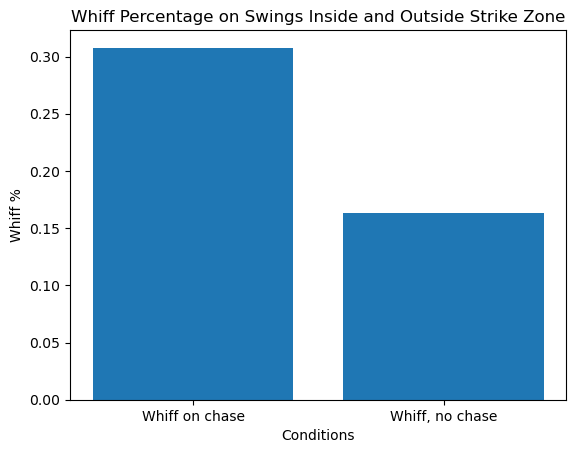

In [29]:
barvals = [whiff_on_chase, whiff_no_chase]
labels = ["Whiff on chase", "Whiff, no chase"]
plt.bar(labels, barvals)
plt.xlabel("Conditions")
plt.ylabel("Whiff %")
plt.title("Whiff Percentage on Swings Inside and Outside Strike Zone")

In [39]:
data6 = data[data["estimated_woba_using_speedangle"].notnull()]
data7 = data6.loc[((data6["zone"] >= 11) & (data6["description"] != "ball"))]
data7
avg_estimated_woba = data7.estimated_woba_using_speedangle.mean()

data8=data6.loc[((data6["zone"]<=9) & (data6["description"] != "ball") & (data6["description"]!="called_strike"))]
data8_mean= data8["estimated_woba_using_speedangle"].mean()
data8_mean

0.3797534013605442

0.3567485208004213

Text(0.5, 1.0, 'Weighted On-Base Average by Zone Position of Ball')

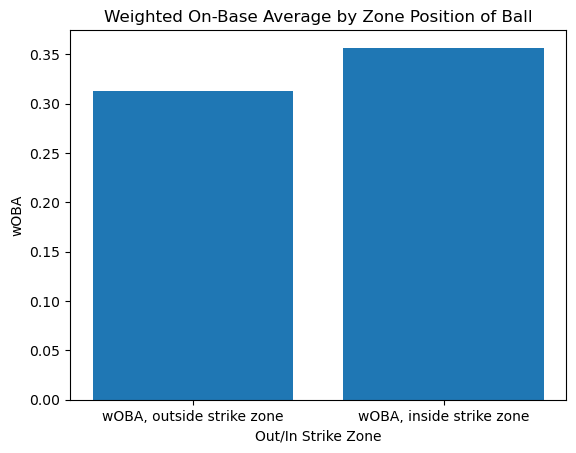

In [40]:
barvals = [d7mean, d8mean]
labels = ["wOBA, outside strike zone", "wOBA, inside strike zone"]
plt.bar(labels, barvals)
plt.xlabel("Out/In Strike Zone")
plt.ylabel("wOBA")
plt.title("Weighted On-Base Average by Zone Position of Ball")

Text(0.5, 0, 'Distance from center of plate')

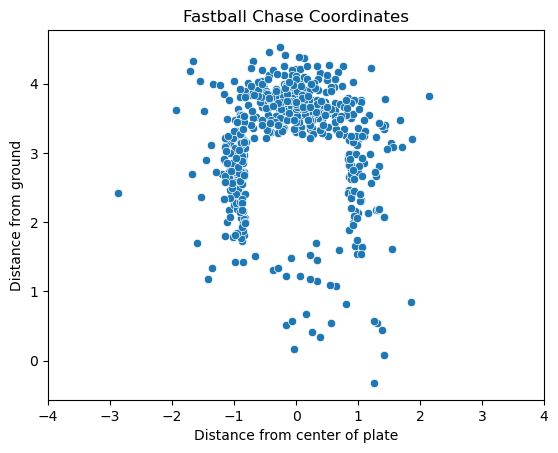

In [48]:
fastballs= data.loc[((data["pitch_type"] =='FF'))]
fastballs_chase=fastballs.loc[((fastballs["zone"] >=11) & (fastballs["description"] != 'ball'))]
fastballs_chase_cords=fastballs_chase[["plate_x", "plate_z"]]
sns.scatterplot(x = fastballs_chase_cords.plate_x, y = fastballs_chase_cords.plate_z)
plt.xlim(-4, 4)
plt.title("Fastball Chase Coordinates")
plt.ylabel("Distance from ground")
plt.xlabel("Distance from center of plate")

In [58]:
fastballs_no_chase=fastballs.loc[((fastballs["zone"] <=11) & (fastballs["description"] != 'ball')& (fastballs["description"] != 'called_strike'))]
spin_rate_no_chase=fastballs_no_chase["release_spin_rate"]
spin_rate_on_chase=fastballs_chase["release_spin_rate"]
spin_rate_on_chase_mean=spin_rate_on_chase.mean()
spin_rate_no_chase_mean=spin_rate_no_chase.mean()
print(spin_rate_on_chase_mean)
print(spin_rate_no_chase_mean)

2381.6279069767443
2355.3132603406325


(2200.0, 2500.0)

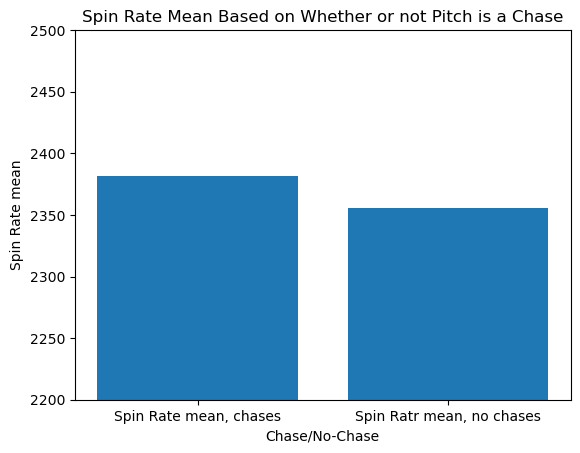

In [65]:
barvals = [spin_rate_on_chase_mean, spin_rate_no_chase_mean]
labels = ["Spin Rate mean, chases", "Spin Ratr mean, no chases"]
plt.bar(labels, barvals)
plt.xlabel("Chase/No-Chase")
plt.ylabel("Spin Rate mean")
plt.title("Spin Rate Mean Based on Whether or not Pitch is a Chase")
plt.ylim(2200, 2500)